In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

# 순환 신경망(Recurrent Neural Network, RNN)

- 루프(loop)를 가진 신경망의 한 종류

- 시퀸스의 원소를 순회하면서 지금까지 처리한 정보를 상태(state)에 저장

# 순환 신경망 레이어 (RNN Layer)

- 입력: (timesteps, input_features)

- 출력: (timesteps, output_features)

In [3]:
import numpy as np

In [10]:
timesteps = 100
input_features = 32
output_features = 64

In [11]:
inputs = np.random.random((timesteps, input_features))
inputs.shape

(100, 32)

In [4]:
state_t = np.zeros((output_features))
state_t

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [7]:
W = np.random.random((output_features, input_features))  # ((64, 32))
U = np.random.random((output_features, output_features)) # ((64,64))
b = np.random.random((output_features))                  # ((64))

In [16]:
W

array([[0.96568732, 0.15391933, 0.55173018, ..., 0.41618563, 0.64024001,
        0.40609341],
       [0.18032859, 0.60920945, 0.77816563, ..., 0.02014359, 0.27166607,
        0.32854512],
       [0.98027285, 0.86689761, 0.33573432, ..., 0.40516997, 0.74328435,
        0.71910119],
       ...,
       [0.52424295, 0.680064  , 0.39914261, ..., 0.47486805, 0.10511741,
        0.9080915 ],
       [0.77057405, 0.80157442, 0.66272744, ..., 0.89948121, 0.30792831,
        0.93415279],
       [0.56219743, 0.90410058, 0.22914901, ..., 0.31718118, 0.62851428,
        0.20507141]])

In [17]:
U

array([[0.15328392, 0.85277886, 0.99012382, ..., 0.6696177 , 0.49373475,
        0.43941809],
       [0.76591773, 0.17344751, 0.69811301, ..., 0.05552352, 0.59549486,
        0.2992629 ],
       [0.07280584, 0.06718065, 0.71891881, ..., 0.20685626, 0.67467039,
        0.83058268],
       ...,
       [0.01889166, 0.08843331, 0.69660246, ..., 0.12972669, 0.92491111,
        0.45064429],
       [0.76038252, 0.4272341 , 0.06139388, ..., 0.7999712 , 0.83389658,
        0.10459687],
       [0.80796785, 0.91218445, 0.90186471, ..., 0.30002306, 0.22390169,
        0.22523803]])

In [18]:
b

array([0.24252418, 0.51572468, 0.55950641, 0.18159698, 0.60032288,
       0.54074271, 0.27690889, 0.15210606, 0.01368326, 0.54685037,
       0.93994071, 0.47274089, 0.04328276, 0.5779857 , 0.16447836,
       0.67597982, 0.17820564, 0.81381847, 0.96130779, 0.34176322,
       0.85550472, 0.25123388, 0.16483293, 0.9166907 , 0.35224052,
       0.07952572, 0.08793411, 0.68986507, 0.17844978, 0.2913564 ,
       0.73254368, 0.82983035, 0.24101508, 0.06956461, 0.95998348,
       0.55072132, 0.05985719, 0.16957984, 0.71029524, 0.84746928,
       0.47769853, 0.95053946, 0.92622628, 0.88452184, 0.67791902,
       0.5033807 , 0.83563406, 0.59633071, 0.8780451 , 0.17756823,
       0.69777889, 0.45441757, 0.19401546, 0.4825912 , 0.70488602,
       0.05495713, 0.98900552, 0.20471676, 0.89070452, 0.88183967,
       0.93904072, 0.56497831, 0.73609438, 0.09742619])

In [8]:
sucessive_outputs = []

In [10]:
for input_t in inputs:
    output_t =  np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    sucessive_outputs.append(output_t)
    state_t = output_t

final_output_sequence = np.stack(sucessive_outputs, axis = 0)

In [14]:
type(sucessive_outputs)
sucessive_outputs

[array([0.99999982, 0.99999672, 0.99999996, 0.99998691, 0.99999938,
        0.99999632, 0.9999921 , 0.9999997 , 0.99998751, 0.99999975,
        0.99999929, 0.99999805, 0.99999985, 0.99999973, 0.99999878,
        0.99999992, 0.99999851, 0.99998946, 0.99999999, 0.99999862,
        0.99999994, 0.99998734, 0.99999946, 0.9999966 , 0.99999872,
        0.99999951, 0.99998752, 0.99999941, 0.99999981, 0.99997496,
        0.99992745, 0.99999998, 0.99999989, 0.99999992, 0.99999937,
        0.99999979, 0.99999929, 0.99999942, 0.9999999 , 0.99999969,
        0.9999999 , 0.99999899, 0.99999977, 0.99999836, 0.99999958,
        0.99999986, 0.99999956, 0.99999864, 0.99999912, 0.99999596,
        0.99999964, 0.99999919, 0.99999998, 0.99999956, 0.99999973,
        0.99999929, 0.99999999, 0.9999952 , 0.99999986, 0.99999962,
        0.99999998, 0.99999717, 0.99999994, 0.99999941]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.

In [15]:
type(final_output_sequence)
final_output_sequence

array([[0.99999982, 0.99999672, 0.99999996, ..., 0.99999717, 0.99999994,
        0.99999941],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

In [4]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

In [22]:
model = Sequential()

In [23]:
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [24]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences= True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [25]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences= True))
model.add(SimpleRNN(32, return_sequences= True))
model.add(SimpleRNN(32, return_sequences= True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [5]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

In [7]:
num_words = 10000
max_len = 500
batch_size = 32

In [28]:
(x_train, y_train), (x_test,y_test) = imdb.load_data(num_words = num_words)

17473536/17464789 [==============================] - 0s 0us/step


In [30]:
print(len(x_train))
print(len(y_test))

25000
25000


In [31]:
pad_x_train = sequence.pad_sequences(x_train, maxlen= max_len)
pad_x_test = sequence.pad_sequences(x_test, maxlen= max_len)

In [33]:
print(pad_x_train.shape)
print(pad_x_test.shape)

(25000, 500)
(25000, 500)


In [35]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


# 모델 학습

In [40]:
history = model.fit(pad_x_train, y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 12s 71ms/step - loss: 0.6168 - accuracy: 0.6564 - val_loss: 0.5370 - val_accuracy: 0.7448
Epoch 2/10
157/157 [==============================] - 11s 70ms/step - loss: 0.4031 - accuracy: 0.8317 - val_loss: 0.4395 - val_accuracy: 0.8034
Epoch 3/10
157/157 [==============================] - 11s 68ms/step - loss: 0.2921 - accuracy: 0.8849 - val_loss: 0.3788 - val_accuracy: 0.8310
Epoch 4/10
157/157 [==============================] - 11s 69ms/step - loss: 0.2403 - accuracy: 0.9090 - val_loss: 0.4813 - val_accuracy: 0.7990
Epoch 5/10
157/157 [==============================] - 11s 69ms/step - loss: 0.1924 - accuracy: 0.9299 - val_loss: 0.3705 - val_accuracy: 0.8522
Epoch 6/10
157/157 [==============================] - 11s 68ms/step - loss: 0.1454 - accuracy: 0.9460 - val_loss: 0.4767 - val_accuracy: 0.8508
Epoch 7/10
157/157 [==============================] - 11s 68ms/step - loss: 0.1070 - accuracy: 0.9628 - val_loss: 0.4382 - val_accuracy:

# 시각화

In [41]:
import matplotlib.pyplot as plt

In [42]:
plt.style.use('seaborn-white')

In [44]:
acc =  history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [45]:
ephochs = range(1, len(loss) + 1)

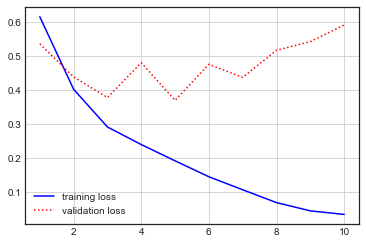

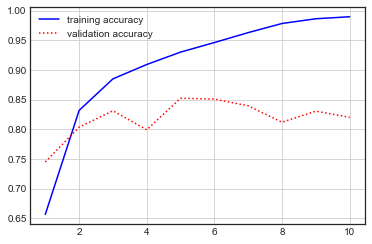

In [49]:
plt.plot(ephochs, loss, 'b-', label='training loss')
plt.plot(ephochs, val_loss, 'r:', label='validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(ephochs, acc, 'b-', label='training accuracy')
plt.plot(ephochs, val_acc, 'r:', label='validation accuracy')
plt.grid()
plt.legend()

plt.show()

# 검증

In [50]:
model.evaluate(pad_x_test,y_test)

782/782 [==============================] - 9s 11ms/step - loss: 0.5944 - accuracy: 0.8187


[0.5943658351898193, 0.8186799883842468]

전체 시퀀스 아니라 순서대로 500개의 단어만 입력했기 떄문에 성능이 낮게 나온다
* SimpleRNN은 긴 시퀀스를 처리하는데 적합하지 않다